In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import swifter
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.pipeline import *
from sklearn.svm import LinearSVC ## used for large dataset
from sklearn.model_selection import *
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv(r"C:\group_urls\final_urls.csv")

In [3]:
df.head()

,Unnamed: 0,product,title,rating,body
0,0,Mi Portable Bluetooth Speaker with 16W Hi-Qual...,Don't Buy,1.0,Battery life is than less 2 Hrs in full volume...
1,1,Mi Portable Bluetooth Speaker with 16W Hi-Qual...,1 week detailed review,5.0,After using 1 week reviewPros:1. Sound quality...
2,2,Mi Portable Bluetooth Speaker with 16W Hi-Qual...,Almost there,4.0,Speakers looks good and has a very good built ...
3,3,Mi Portable Bluetooth Speaker with 16W Hi-Qual...,Battery life is so weak. It doesn't last even ...,1.0,Sound and Bass is very good. But battery life ...
4,4,Mi Portable Bluetooth Speaker with 16W Hi-Qual...,Not a reliable one,2.0,Ok so I bought this speaker on 12 of July 2021...


In [4]:
## dropping unnecessary columns
df.drop(df.columns[df.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)

In [5]:
df.head()

,product,title,rating,body
0,Mi Portable Bluetooth Speaker with 16W Hi-Qual...,Don't Buy,1.0,Battery life is than less 2 Hrs in full volume...
1,Mi Portable Bluetooth Speaker with 16W Hi-Qual...,1 week detailed review,5.0,After using 1 week reviewPros:1. Sound quality...
2,Mi Portable Bluetooth Speaker with 16W Hi-Qual...,Almost there,4.0,Speakers looks good and has a very good built ...
3,Mi Portable Bluetooth Speaker with 16W Hi-Qual...,Battery life is so weak. It doesn't last even ...,1.0,Sound and Bass is very good. But battery life ...
4,Mi Portable Bluetooth Speaker with 16W Hi-Qual...,Not a reliable one,2.0,Ok so I bought this speaker on 12 of July 2021...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602771 entries, 0 to 602770
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   product  602771 non-null  object 
 1   title    602728 non-null  object 
 2   rating   602770 non-null  float64
 3   body     596763 non-null  object 
dtypes: float64(1), object(3)
memory usage: 18.4+ MB


In [7]:
df.shape

(602771, 4)

In [8]:
## changing column name
df.rename(columns={'body':'reviews'},inplace = True)

In [9]:
df.head()

,product,title,rating,reviews
0,Mi Portable Bluetooth Speaker with 16W Hi-Qual...,Don't Buy,1.0,Battery life is than less 2 Hrs in full volume...
1,Mi Portable Bluetooth Speaker with 16W Hi-Qual...,1 week detailed review,5.0,After using 1 week reviewPros:1. Sound quality...
2,Mi Portable Bluetooth Speaker with 16W Hi-Qual...,Almost there,4.0,Speakers looks good and has a very good built ...
3,Mi Portable Bluetooth Speaker with 16W Hi-Qual...,Battery life is so weak. It doesn't last even ...,1.0,Sound and Bass is very good. But battery life ...
4,Mi Portable Bluetooth Speaker with 16W Hi-Qual...,Not a reliable one,2.0,Ok so I bought this speaker on 12 of July 2021...


In [10]:
## since we only need rating and reviews
df = df[['rating','reviews']]

In [11]:
df.head(20)

,rating,reviews
0,1.0,Battery life is than less 2 Hrs in full volume...
1,5.0,After using 1 week reviewPros:1. Sound quality...
2,4.0,Speakers looks good and has a very good built ...
3,1.0,Sound and Bass is very good. But battery life ...
4,2.0,Ok so I bought this speaker on 12 of July 2021...
5,4.0,The media could not be loaded.\n ...
6,2.0,Sound quality is okay but you'll be cheated on...
7,4.0,One of the best speaker in this price range. I...
8,1.0,I have used many Mi products but this one was ...
9,3.0,"Company Claims battery backup 13hours..But, Af..."


### Data Cleaning

##### checking nan values

In [12]:
df.isnull().sum()

rating        1
reviews    6008
dtype: int64

##### dropping nan values

In [13]:
df.dropna(axis=0,inplace=True)

In [14]:
df.head()

,rating,reviews
0,1.0,Battery life is than less 2 Hrs in full volume...
1,5.0,After using 1 week reviewPros:1. Sound quality...
2,4.0,Speakers looks good and has a very good built ...
3,1.0,Sound and Bass is very good. But battery life ...
4,2.0,Ok so I bought this speaker on 12 of July 2021...


##### again checking nan values

In [15]:
df.isnull().sum()

rating     0
reviews    0
dtype: int64

##### checking reviews

In [16]:
text = df['reviews'][9]
text

'Company Claims battery backup 13hours..But, After full charge battery drops to 50% within 1 hour playing..Sound quality is good not super impressed.With full volume sound cracked in high base song, with 80% volume song plays well.I think company should fix this battery problem...'

In [17]:
text = df['reviews'][7]
text

"One of the best speaker in this price range. I got it Rs 2499 only.Everything work properly.But, I can't find huge difference between high bass and normal bass.To get it's best performance, you need to run it on 60-70% volume level.Bye the way, it's a fantastic speaker."

##### removing unwanted words

In [18]:
def cleanreviews(text):
    text = text.lower()
    users = re.findall('@\w+',text)
    links = re.findall('http[a-z0-9://.]+',text)
    hashtags = re.findall('#[a-z0-9://.]+',text)
    replace_terms = []
    replace_terms.extend(links)
    replace_terms.extend(users)
    replace_terms.extend(hashtags)
    for t in replace_terms:
        text = re.sub(t,'',text)
    text = " ".join([t for t in re.findall('\w+',text) if len(t)>2])
    return text

In [19]:
df['reviews'] = df['reviews'].swifter.apply(cleanreviews)

Pandas Apply:   0%|          | 0/596762 [00:00<?, ?it/s]

In [20]:
text = df['reviews'][0]
text

'battery life than less hrs full volume and company claiming hours playtime sound quality good but company should improve battery life least hrs from one time charging'

In [21]:
text = df['reviews'][9]
text

'company claims battery backup 13hours but after full charge battery drops within hour playing sound quality good not super impressed with full volume sound cracked high base song with volume song plays well think company should fix this battery problem'

### EDA

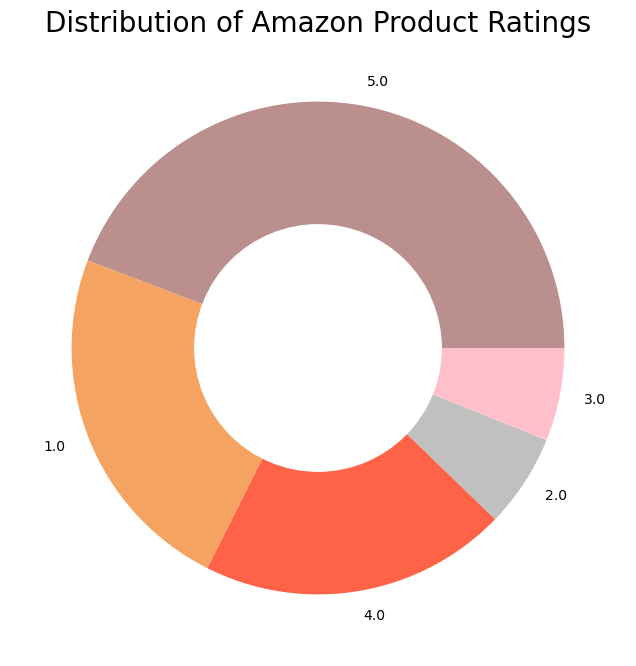

In [22]:
## Distribution of Amazon Ratings

plt.style.use('default')
ratings = df["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["rosybrown", "sandybrown", 'tomato', "silver", "pink"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()  ## The gcf() method gets the current figure and returns it.
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.show()

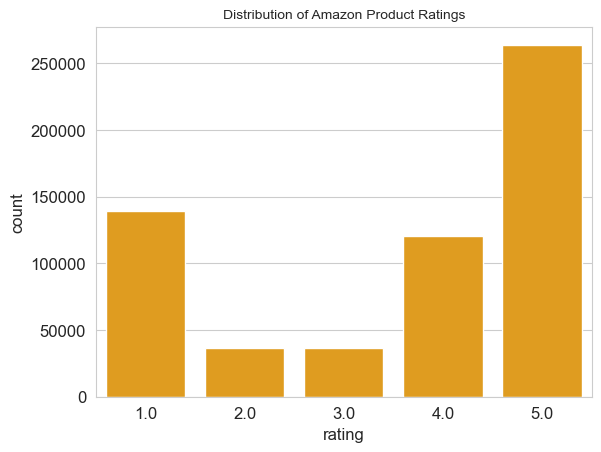

In [23]:
sns.set_style("whitegrid")
sns.countplot(x='rating',data=df,color="orange")
plt.title("Distribution of Amazon Product Ratings", fontsize=10)
plt.show()

##### dividing reviews into good and bad
- positive (good review) = >3 star rating
- negative (bad review) = <3 star rating

In [24]:
df['sentiments'] = df['rating'].apply(lambda x: 1 if x >=3  else 0)

In [25]:
df.head(20)

,rating,reviews,sentiments
0,1.0,battery life than less hrs full volume and com...,0
1,5.0,after using week reviewpros sound quality2 bas...,1
2,4.0,speakers looks good and has very good built an...,1
3,1.0,sound and bass very good but battery life real...,0
4,2.0,bought this speaker july 2021 thinking that go...,0
5,4.0,the media could not loaded the sound excellent...,1
6,2.0,sound quality okay but you cheated the battery...,0
7,4.0,one the best speaker this price range got 2499...,1
8,1.0,have used many products but this one was the l...,0
9,3.0,company claims battery backup 13hours but afte...,1


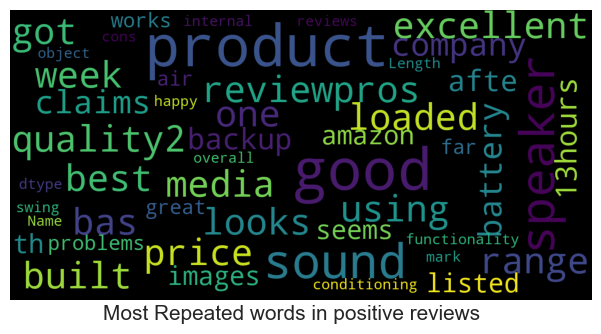

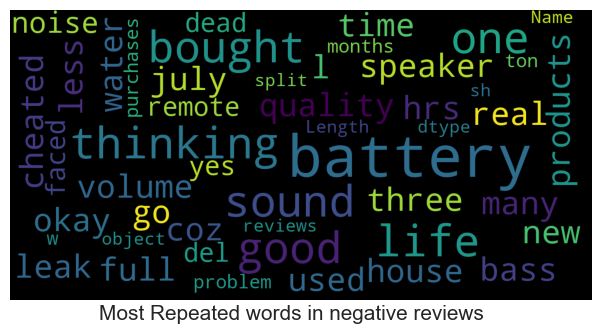

In [26]:
from wordcloud import WordCloud,STOPWORDS
# Most repeated words in reviews
stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(data))
    fig = plt.figure(figsize = (7.5, 7.5))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()
    
# seperating all records into a different variable to generate wordcloud based on category
neg=df[df["sentiments"] == 0]["reviews"]
pos=df[df["sentiments"] == 1]["reviews"]


# Generating wordcloud based on category
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")

### Model Building

In [27]:
## checking distribution of target class
df['sentiments'].value_counts()

1    420779
0    175983
Name: sentiments, dtype: int64

In [28]:
x = df['reviews']
y = df['sentiments']

##### splitting into train and test

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state =1)

In [30]:
vect = CountVectorizer()
vect.fit(x_train)
x_vect = vect.transform(x_train)

In [31]:
x_vect_test = vect.transform(x_test)

In [32]:
x_vect_test

<179029x53665 sparse matrix of type '<class 'numpy.int64'>'
	with 5258149 stored elements in Compressed Sparse Row format>

In [33]:
## we fit and transform x_train only because model learns from the training dataset so there is not need to fit x_test...we only transform x_test

##### Models

##### Linear SVC

In [34]:
model1=LinearSVC(max_iter=1000)
model1.fit(x_vect,y_train)

y_train_pred = model1.predict(x_vect)
y_test_pred = model1.predict(x_vect_test)

print("Train performance:")
print(classification_report(y_train,y_train_pred))
print("Test performance:")
print(classification_report(y_test,y_test_pred))

Train performance:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95    123292
           1       0.97      0.99      0.98    294441

    accuracy                           0.97    417733
   macro avg       0.97      0.96      0.96    417733
weighted avg       0.97      0.97      0.97    417733

Test performance:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93     52691
           1       0.96      0.98      0.97    126338

    accuracy                           0.96    179029
   macro avg       0.95      0.94      0.95    179029
weighted avg       0.96      0.96      0.96    179029



##### XGBOOST

In [35]:
model2 = XGBClassifier()
model2.fit(x_vect,y_train)

y_test_pred = model2.predict(x_vect_test)

y_train_proba = model2.predict_proba(x_vect)[:,1]
y_test_proba = model2.predict_proba(x_vect_test)[:,1]

y_train_pred = model2.predict(x_vect)
y_test_pred = model2.predict(x_vect_test)

print("Train performance:")
print(classification_report(y_train,y_train_pred))
print("Test performance:")
print(classification_report(y_test,y_test_pred))

[23:13:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train performance:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91    123292
           1       0.95      0.98      0.96    294441

    accuracy                           0.95    417733
   macro avg       0.95      0.93      0.94    417733
weighted avg       0.95      0.95      0.95    417733

Test performance:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     52691
           1       0.95      0.98      0.96    126338

    accuracy                           0.95    179029
   macro avg       0.94      0.93      0.93    179029
weighted avg       0.95      0.95      0.95    179029


##### saving model into dump format

In [37]:
import pickle

In [39]:
filename = "final_vectorizer.sav"
pickle.dump(vect, open(filename,'wb'))

filename = "final_model.sav"
pickle.dump(model1, open(filename,'wb'))